In [11]:
library(Seurat)
library(MetaMarkers)

In [3]:
sc1 = readRDS('Selewa_data.rds')
Idents(sc1) = 'tissue'
sc1

An object of class Seurat 
57575 features across 49359 samples within 1 assay 
Active assay: RNA (57575 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: harmony, pca, umap

In [4]:
sc1@meta.data[1,]

donor_id   self_reported_ethnicity_ontology_term_id
ACGTAACTCGGTCGAC_1 donor_2207 HANCESTRO:0005                          
                   donor_living_at_sample_collection organism_ontology_term_id
ACGTAACTCGGTCGAC_1 False                             NCBITaxon:9606           
                   sample_preservation_method tissue_ontology_term_id
ACGTAACTCGGTCGAC_1 frozen at -80C             UBERON:0002094         
                   development_stage_ontology_term_id donor_BMI_at_collection
ACGTAACTCGGTCGAC_1 HsapDv:0000148                     30.35                  
                   tissue_type suspension_derivation_process ⋯
ACGTAACTCGGTCGAC_1 tissue      mechanical dissociation       ⋯
                   cell_number_loaded cell_type                assay    
ACGTAACTCGGTCGAC_1 6000–8000          cardiac endothelial cell 10x 3' v3
                   disease organism     sex  tissue                 
ACGTAACTCGGTCGAC_1 normal  Homo sapiens male interventricular septum
                   self_reported_ethnicity development_stage      
ACGTAACTCGGTCGAC_1 European                54-year-old human stage
                   observation_joinid
ACGTAACTCGGTCGAC_1 *>)}s2~Xal

In [6]:
table(sc1$tissue)


  heart right ventricle    heart left ventricle interventricular septum 
                  10623                   11880                   13709 
          apex of heart 
                  13147 

In [15]:
# get markers with gradient exp across septum - get LV vs RV first
markers1 <- FindMarkers(sc1, ident.1 = 'heart left ventricle', ident.2 = 'heart right ventricle', only.pos = TRUE)
ginfo = read.delim('/data/CoCoCoNet/geneInfo/human_info.csv', sep = ',')
markers1$symbol = ginfo$GeneSymbol[match(rownames(markers1), ginfo$NetworkIDs)]
head(markers1)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     symbol
ENSG00000198840  0.000000e+00 1.9070966  0.627 0.323  0.000000e+00 ND3   
ENSG00000198899  0.000000e+00 1.6794339  0.654 0.361  0.000000e+00 ATP6  
ENSG00000198886  0.000000e+00 1.6969181  0.608 0.327  0.000000e+00 ND4   
ENSG00000198727  0.000000e+00 1.4899386  0.630 0.370  0.000000e+00 CYTB  
ENSG00000198938  0.000000e+00 1.4276238  0.719 0.490  0.000000e+00 COX3  
ENSG00000265972 3.434014e-305 0.8594469  0.626 0.381 1.977134e-300 TXNIP

In [25]:
list1 = markers1$symbol[1:150]
list1
list2 = rownames(markers1)[1:50]

[1] "ND3"         "ATP6"        "ND4"         "CYTB"        "COX3"       
  [6] "TXNIP"       "COX2"        "ND1"         "SPTBN1"      "PTPRK"      
 [11] "CDK6"        "RUNX1T1"     "CD36"        "FHL2"        "RAPGEF2"    
 [16] "ND2"         "MEOX2"       "PALMD"       "ZBTB20"      "COBLL1"     
 [21] "NCOA2"       "ID1"         "LIMCH1"      "ZBTB16"      NA           
 [26] "DDX17"       "ND5"         "SORBS2"      "APOD"        "SOS1"       
 [31] "RASAL2"      "SYNPO2"      "ND4L"        "DTNA"        "MGLL"       
 [36] "GAB1"        "TECRL"       "ADD3"        "UACA"        "TTN"        
 [41] "STOX2"       "CLIC5"       "KLHL24"      "TJP1"        "PIR"        
 [46] "IRS1"        "NR3C2"       "ADGRL2"      "PPP3CC"      "CYYR1"      
 [51] "PREX2"       "DAPK2"       "NEK7"        "TRPC1"       "EML1"       
 [56] "KLF2"        "ZNF280D"     "NBEA"        "SPHKAP"      "FAM214A"    
 [61] "NEBL"        "HAND2-AS1"   "PLCB4"       "ARHGAP31"    "ARHGAP29"   
 [66] "RNU6-6P"     "SMARCA2"     "CTDSPL"      "STXBP6"      "NFIB"       
 [71] NA            "CHRM2"       "TCF15"       "TNRC6A"      "LRRC77P"    
 [76] "FNBP1L"      "MTATP6P1"    "PPFIBP1"     "ZNF704"      "TMEM65"     
 [81] "LHFPL6"      "ABLIM1"      "CHPT1"       "ICA1"        "KLF12"      
 [86] "RFX3"        "NFIA"        "COX1"        "RNR1"        "EBF3"       
 [91] "NTN4"        "ZNF366"      "CMTM8"       "ST8SIA6"     "MYLK3"      
 [96] "ABLIM3"      "TRAK2"       "EBF1"        "JCAD"        "ARHGAP24"   
[101] "MEF2C"       "MBD5"        "KLHL5"       "ACSS3"       "FOXP1"      
[106] "FBXL7"       "CMYA5"       "JAZF1"       "MFSD6"       "FIGN"       
[111] "SH3D19"      "CACNB2"      "SPAAR"       "MEF2A"       "CD34"       
[116] "GNAI1"       "PGM5"        "MLIP"        "RNF19A"      "ADAMTS9-AS2"
[121] "AQP1"        NA            "RNR2"        "PPP1R12B"    "HECW2"      
[126] "KLF3"        "CD58"        "SHE"         "FBXL17"      "PPM1K"      
[131] "PRKD1"       "SOX18"       "CTNND2"      "PHKB"        NA           
[136] "ARL15"       "LIMS2"       "JAM2"        "PLCL1"       "TMEM245"    
[141] "RCAN2"       "ITGA6"       "XPR1"        "NT5DC1"      "RCOR3"      
[146] "HERC1"       "MPDZ"        "ATF7IP"      "CHN1"        "BAZ2B"

Warning message:
“Scaling data with a low number of groups may produce misleading results”


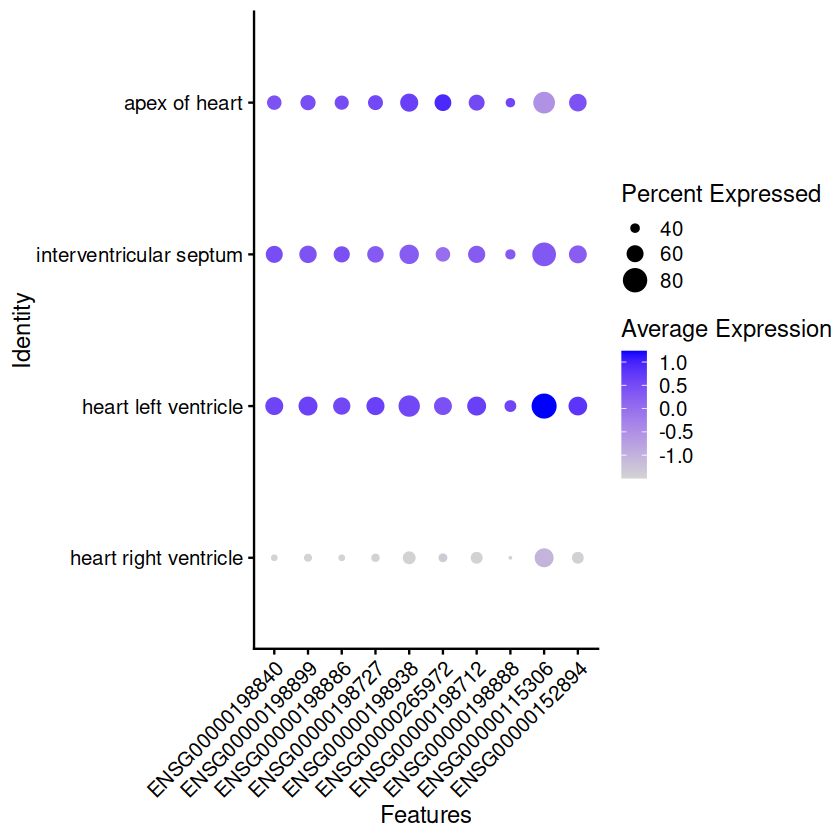

In [22]:
DotPlot(sc1, features = list2[1:10], group.by = "tissue") + RotatedAxis()